# Classification and Regression Trees

## Import required packages.

In [1]:
# !pip install dmba
# !pip install graphviz
# !conda install graphviz

In [2]:
import os
os.environ["PATH"] += os.pathsep +'c:/users/naran/Anaconda3/envs/keras/Library/bin/graphviz/'

In [3]:
from pathlib import Path
import graphviz
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from dmba import plotDecisionTree, classificationSummary, regressionSummary

%matplotlib inline   
import matplotlib.pylab as plt

## Riding Mowers: first split, second split, and full split. 

In [4]:
# Create data frame for Riding Mowers data set. 
mower_df = pd.read_csv('RidingMowers.csv')

# Show the Riding Mower data frame.
print(mower_df)

    Income  Lot_Size Ownership
0     60.0      18.4     Owner
1     85.5      16.8     Owner
2     64.8      21.6     Owner
3     61.5      20.8     Owner
4     87.0      23.6     Owner
5    110.1      19.2     Owner
6    108.0      17.6     Owner
7     82.8      22.4     Owner
8     69.0      20.0     Owner
9     93.0      20.8     Owner
10    51.0      22.0     Owner
11    81.0      20.0     Owner
12    75.0      19.6  Nonowner
13    52.8      20.8  Nonowner
14    64.8      17.2  Nonowner
15    43.2      20.4  Nonowner
16    84.0      17.6  Nonowner
17    49.2      17.6  Nonowner
18    59.4      16.0  Nonowner
19    66.0      18.4  Nonowner
20    47.4      16.4  Nonowner
21    33.0      18.8  Nonowner
22    51.0      14.0  Nonowner
23    63.0      14.8  Nonowner


Classes: Nonowner, Owner

Classification Tree after First Split


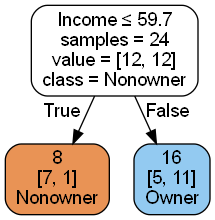

In [5]:
# Apply DecisionTreeClassifier() function to create classification tree.
# Use max_depth to control tree size: 
        # for the first split: max_depth=1;
        # for the two splits:  max_depth=2;
        # for full tree: max_depth=None (don't use it). 
# Parameter random_state controls randomness of the estimator,
# for random_state=0, the integer value of 0 is a seed value
# to control random choices in the function.

# Create classification tree for the first split (max_depth=1)
classTree = DecisionTreeClassifier(random_state=0, max_depth=1)

# Fit Riding Mower data frame (Income and Lot_Size) into the tree. 
# Column 'Ownership' as outcome is not used for the fitting algorithm. 
classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

# Display classes used in the classification tree: 'Nonowner' and 'Owner'. 
print("Classes: {}".format(', '.join(classTree.classes_)))

# Use plotDecisionTree() function to visualize the classfication tree.
# The order of the 'value' in the boxes is the same as 'classTree.classes_',
# i.e., the first number is 'Nonowners' and the second number 'Owners'.
print()
print('Classification Tree after First Split')
plotDecisionTree(classTree, feature_names=mower_df.columns[:2], class_names=classTree.classes_)

Classes: Nonowner, Owner

Classification Tree after Second Split


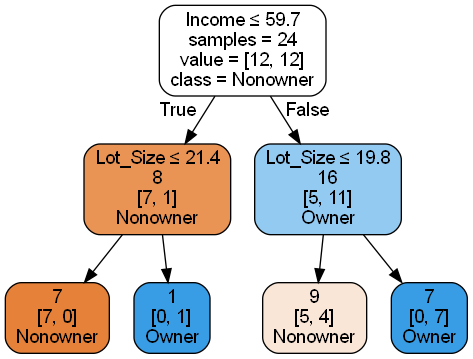

In [6]:
# Create classification tree for the second split (max_depth=2).
classTree = DecisionTreeClassifier(random_state=0, max_depth=2)

# Fit Riding Mower data frame (Income and Lot_Size) into the tree. 
# Column 'Ownership' as outcome is not used for the fitting algorithm. 
classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

# Display classes used in the classification tree: 'Nonowner' and 'Owner'.
print("Classes: {}".format(', '.join(classTree.classes_)))

# Use plotDecisionTree() function to visualize the classfication tree.
# The order of the 'value' in the boxes is the same as 'classTree.classes_',
# i.e., the first number is 'Nonowners' and the second number 'Owners'.
print()
print('Classification Tree after Second Split')
plotDecisionTree(classTree, feature_names=mower_df.columns[:2], class_names=classTree.classes_)

Classes: Nonowner, Owner

Full Classification Tree after All Splits


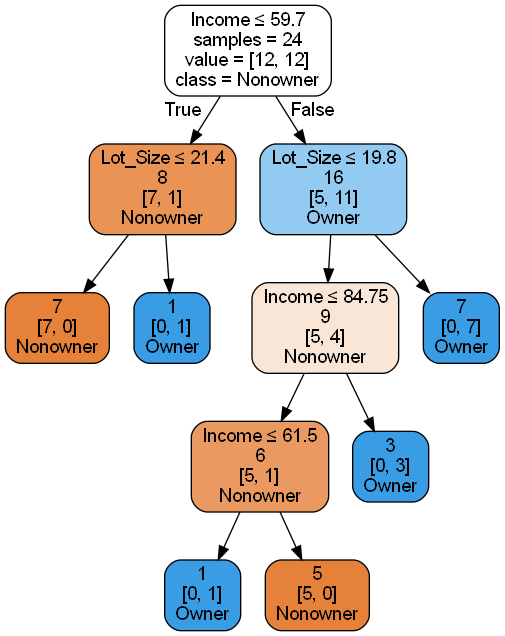

In [7]:
# Apply DecisionTreeClassifier() function to create full classification tree.
# Don't use max_depth for growing full tree. 
classTree = DecisionTreeClassifier(random_state=0)

# Fit Riding Mower data frame (Income and Lot_Size) into the tree. 
# Column 'Ownership' is not used for the fitting algorithm. 
classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

# Display classes used in the classification tree: 'Nonowner' and 'Owner'.
print("Classes: {}".format(', '.join(classTree.classes_)))

# Use plotDecisionTree() function to visualize the classfication tree.
# The order of the 'value' in the boxes is the same as 'classTree.classes_',
# i.e., the first number is 'Nonowners' and the second number 'Owners'.
print()
print('Full Classification Tree after All Splits')
plotDecisionTree(classTree, feature_names=mower_df.columns[:2], class_names=classTree.classes_)

## Riding Movers: apply confusion matrix and make classifications for new data. 

In [8]:
# For Riding Movers, create data frame with 
# classifiers (predictors), 'Income' and 'Lot_Size'.
mower_df_X = mower_df.drop(columns=['Ownership'])

# Create data frame with output variables, 'Owenership'.
mower_df_Y = mower_df['Ownership']

# Use the classificationSummary() function to create
# a confusion matrix for the full classification tree.
classificationSummary(mower_df_Y, classTree.predict(mower_df_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual  0  1
     0 12  0
     1  0 12


In [9]:
# Make Riding Mowers classification for new data set.

# Develop data frame with 2 new records. 
# Notice that the 'Ownership' outcome variable
# is not present in these records.
new_data_mowers = pd.DataFrame({
            'Income': [65, 48],
            'Lot_Size': [20, 20.5],
})

# Make classifications for new data. 
pred_mowers = classTree.predict(new_data_mowers)

# Display new data and classifications based on 
# new data.
print('New Riding Mowers Data and Classifications for New Data')
print(new_data_mowers)
print('Classifications: ', pred_mowers)

# Another way to display new data and classifications 
# for new data.
pred_result = pd.DataFrame({
            'Income': [65, 48],
            'Lot_Size': [20, 20.5],
            'Classification': pred_mowers,
})
print()
print('New Riding Mowers Data and Classifications for New Data')
print(pred_result)

New Riding Mowers Data and Classifications for New Data
   Income  Lot_Size
0      65      20.0
1      48      20.5
Classifications:  ['Owner' 'Nonowner']

New Riding Mowers Data and Classifications for New Data
   Income  Lot_Size Classification
0      65      20.0          Owner
1      48      20.5       Nonowner


## Universal Bank personal loan: grow full classification tree and develop confusion matrix.

In [10]:
# Create data frame for Universal Bank data set and show
# the first 10 records.
bank_df = pd.read_csv('UniversalBank.csv')
print(bank_df.head(10))

# Drop (remove)'ID' and 'ZIP Code' variables which are
# not relevant for model building.
bank_df = bank_df.drop(columns=['ID', 'ZIP Code'])

# Develop predictors X and output variable Y for the data set.
X = bank_df.drop(columns=['Personal Loan'])
y = bank_df['Personal Loan']

# Develop training (60%) and validation(40% or 0.4) partitions for
# UniversalBank data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)


   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   
5   6   37          13      29     92121       4    0.4          2       155   
6   7   53          27      72     91711       2    1.5          2         0   
7   8   50          24      22     93943       1    0.3          3         0   
8   9   35          10      81     90089       3    0.6          2       104   
9  10   34           9     180     93023       1    8.9          3         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0

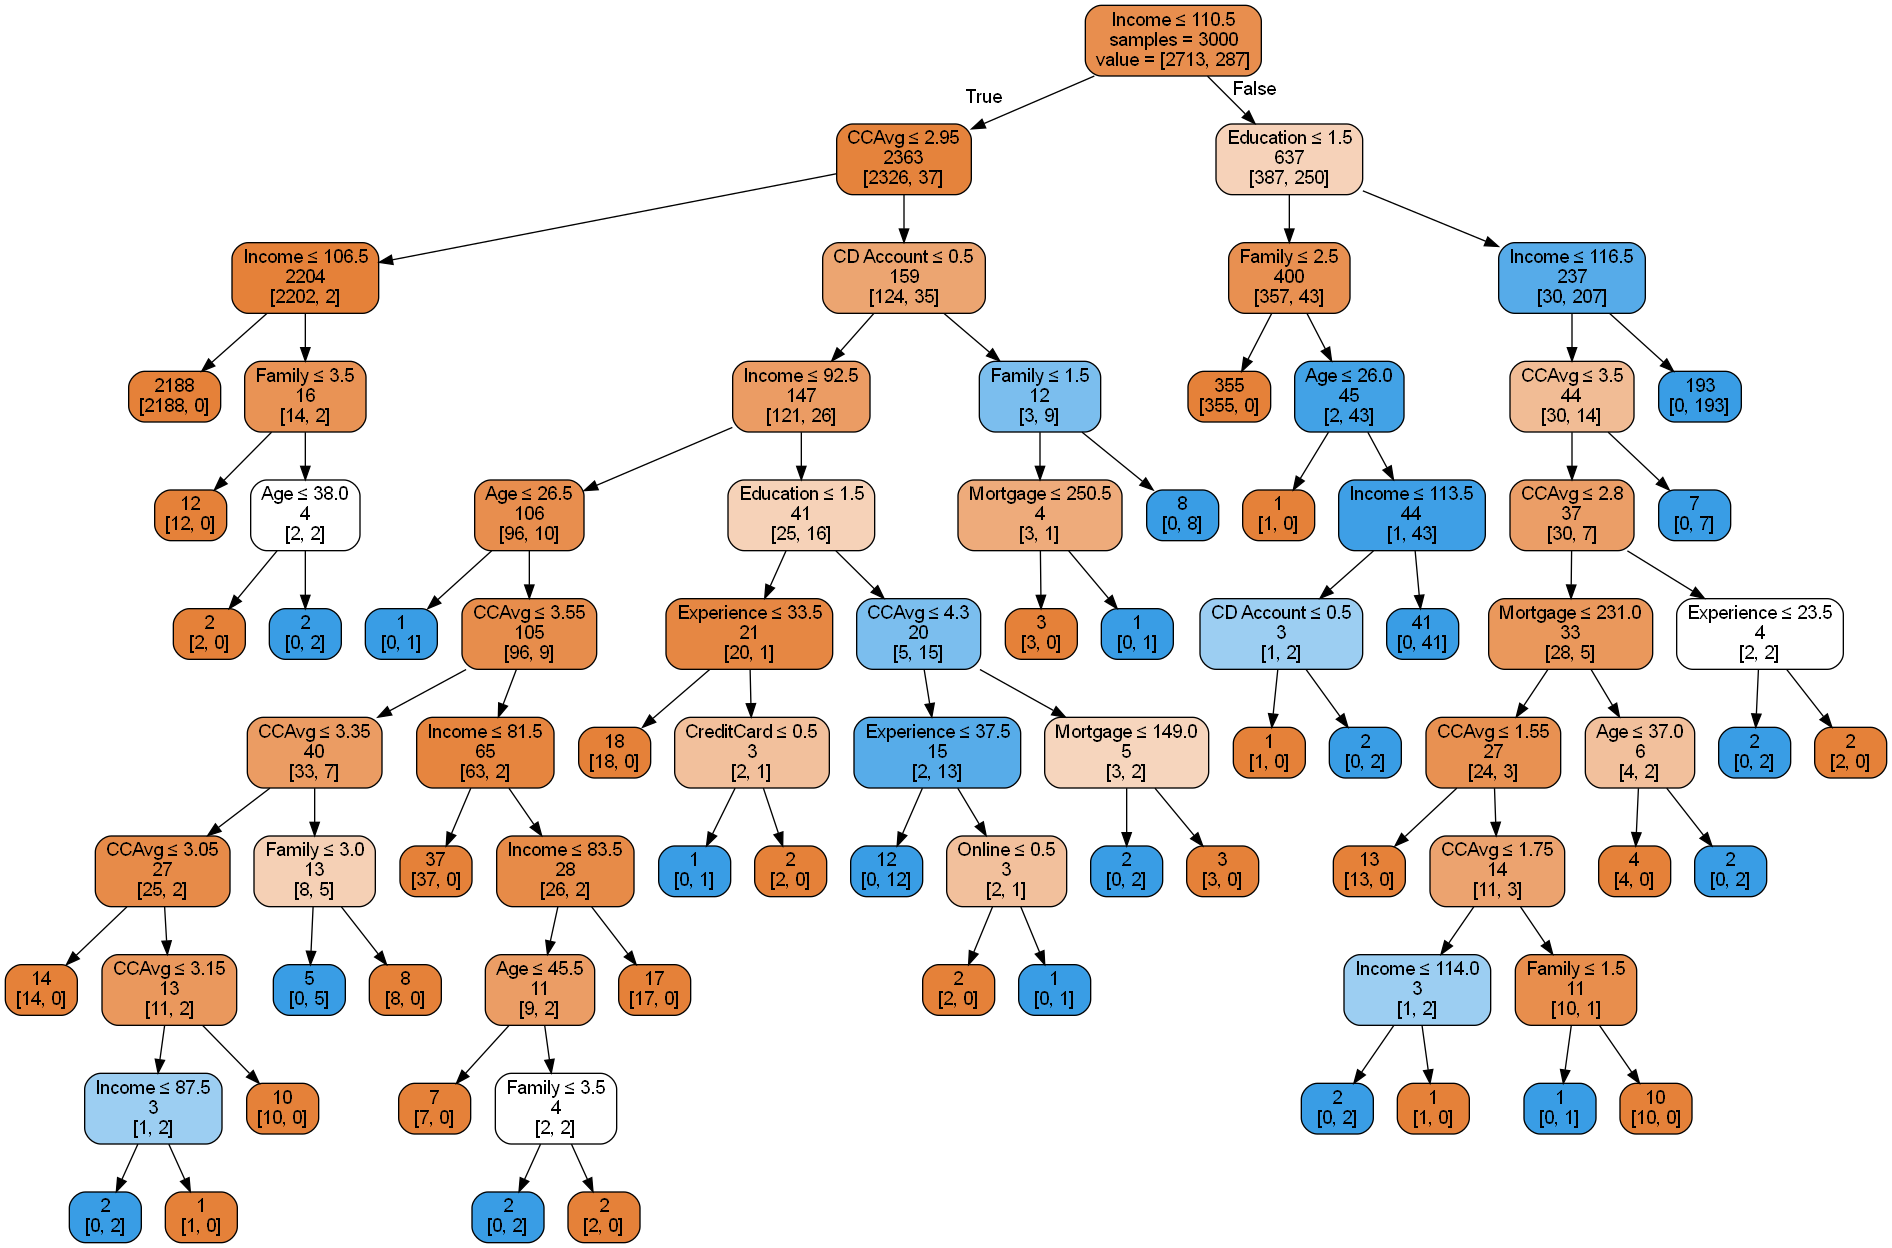

In [11]:
# Grow full classification tree using training partition.
fullClassTree = DecisionTreeClassifier(random_state=1)
fullClassTree.fit(train_X, train_y)

# Using plotDecisionTree() to visualize the full tree.
plotDecisionTree(fullClassTree, feature_names=train_X.columns)

In [12]:
# Indetify and display number of nodes in the tree.
tree_nodes = fullClassTree.tree_.node_count
print('Number of nodes:', tree_nodes)

Number of nodes: 85


In [13]:
# Confusion matrices for full classification tree. 

# Identify  and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, fullClassTree.predict(train_X))

# Identify  and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, fullClassTree.predict(valid_X))

# Accuracy =(1790 + 168)/2000 = 0.9790 = 97.90%
# Misclissification = (25+17)/2000 = 0.021 = 2.1% = 1- Accuracy = 1-0.979 = 0.021 = 2.1%

Training Partition
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 2713    0
     1    0  287

Validation Partition
Confusion Matrix (Accuracy 0.9790)

       Prediction
Actual    0    1
     0 1790   17
     1   25  168


## Five-fold cross-validation for Universal Bank classification tree.

In [14]:
# Five-fold cross-validation of the full decision tree classifier.
# Develop full classification tree.  
treeClassifier = DecisionTreeClassifier()

# Use cross_val_score() function to identify performance 
# accuracy for 5 folds (cv=5) of cross-validation partitioning.
scores = cross_val_score(treeClassifier, train_X, train_y, cv=5)

# Display performance accuracy scores for each fold partition.
# Use three decimals (.3f) for each accuracy score using the 
# acc (accumulator) parameter. 
print('Performance Accuracy of 5-Fold Cross-Validation')
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])

# Indetify and display two standard deviation confidence interval for 
# population mean scores.
print()
print('Two Standard Deviation (95%) Confidence Interval for Mean Accuracy')
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')

Performance Accuracy of 5-Fold Cross-Validation
Accuracy scores of each fold:  ['0.985', '0.973', '0.995', '0.987', '0.990']

Two Standard Deviation (95%) Confidence Interval for Mean Accuracy
Accuracy: 0.986 (+/- 0.014)


## Smaller classification tree using DecisionTreeClassifier() control parameters.

Small Classification Tree with Control Parameters


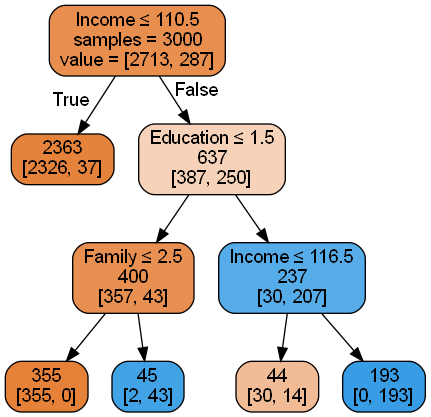

In [15]:
# Create a smaller classification tree for training partition
# using DecisionTreeClassifier() function control parameters:
#  - Maximum Tree depth (number of splits) = 30;
#  - Minimum impurity decrease per split = 0.01 
#  - Minimum number of sample records in a node for splitting = 20.   
smallClassTree = DecisionTreeClassifier(max_depth=30, 
        min_impurity_decrease=0.01, min_samples_split=20)
smallClassTree.fit(train_X, train_y)

# Display classification tree for training partition.
print('Small Classification Tree with Control Parameters')
plotDecisionTree(smallClassTree, feature_names=train_X.columns)

In [16]:
# Confusion matrices for smaller classification tree. 

# Identify  and display confusion matrix for training partition. 
print('Training Partition for Smaller Tree')
classificationSummary(train_y, smallClassTree.predict(train_X))

# Identify  and display confusion matrix for validation partition. 
print()
print('Validation Partition for Smaller Tree')
classificationSummary(valid_y, smallClassTree.predict(valid_X))

# Miscalssfication for validation partition = 1 - 0.977 = 0.023 = 2.3% 
# Misclassification = (43 + 3)/2000 = 0.023 = 2.3%

Training Partition for Smaller Tree
Confusion Matrix (Accuracy 0.9823)

       Prediction
Actual    0    1
     0 2711    2
     1   51  236

Validation Partition for Smaller Tree
Confusion Matrix (Accuracy 0.9770)

       Prediction
Actual    0    1
     0 1804    3
     1   43  150


In [17]:
# Make classification for new data using smaller classfication tree. 

# Develop dataframe with 3 new records. Notice that the 
# 'Personal Loan' outcome variable is not present in these records. 
# New data is used for 'Income', 'Family', and 'Education', the 3
# preditors used in smaller classification tree. 
new_data_small = pd.DataFrame({
            'Age': [0,0,0],  
            'Experience': [0,0,0],
            'Income': [115, 122, 84],
            'Family': [1, 4, 2],  
            'CCAvg': [0, 0, 0],
            'Education': [1, 3, 2],
            'Mortgage': [0,0,0],
            'Securities Account': [0, 0, 0],  
            'CD Account': [0, 0, 0],  
            'Online': [0, 0, 0],  
            'CreditCard': [0, 0, 0],
})

# Make classifications for new data. 
pred_small_tree = smallClassTree.predict(new_data_small)

# Make classifications for new Universal Bank data.
pred_small_result = pd.DataFrame({
            'Income': [115, 122, 84],
            'Family': [1, 4, 2],
            'Education': [1, 3, 2],
            'Classification': pred_small_tree,
})

print()
print('Classifications for Personal Loan')
print(pred_small_result)


Classifications for Personal Loan
   Income  Family  Education  Classification
0     115       1          1               0
1     122       4          3               1
2      84       2          2               0


## Grid search for Universal Bank classification tree.

In [18]:
# Start with initial guess for parameters.
param_grid = {
    'max_depth': [10, 20, 30, 40],  
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
    'min_samples_split': [20, 40, 60, 80, 100],
}

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeClassifier() initial parameters. cv=5 means that
# 5-fold cross-validation is used in this case, and n_jobs=-1 
# means that the availalbe computer memory (CPU) will be 
# used to make calculations faster. 
gridSearch_init = GridSearchCV(DecisionTreeClassifier(), 
                   param_grid, cv=5, n_jobs=-1)
gridSearch_init.fit(train_X, train_y)

# Display best initial paramenters of classification tree. 
print(f'Initial score:{gridSearch_init.best_score_:.4f}')
print('Initial parameters: ', gridSearch_init.best_params_)

Initial score:0.9877
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.0005, 'min_samples_split': 20}


In [19]:
# Improve grid search parameters by adapting grid based 
# on results from initial grid search parameters.
param_grid = {
    'max_depth': list(range(2, 20)),  
    'min_impurity_decrease': [0, 0.0005, 0.001], 
    'min_samples_split': list(range(10, 30)),
}

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeClassifier() improved parameters. 
gridSearch = GridSearchCV(DecisionTreeClassifier(), 
                param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

# Display best improved paramenters of classification tree. 
print()
print(f'Improved score:{gridSearch.best_score_:.4f}')
print('Improved parameters: ', gridSearch.best_params_)


Improved score:0.9883
Improved parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 21}


Best Classification Tree with Grid Search


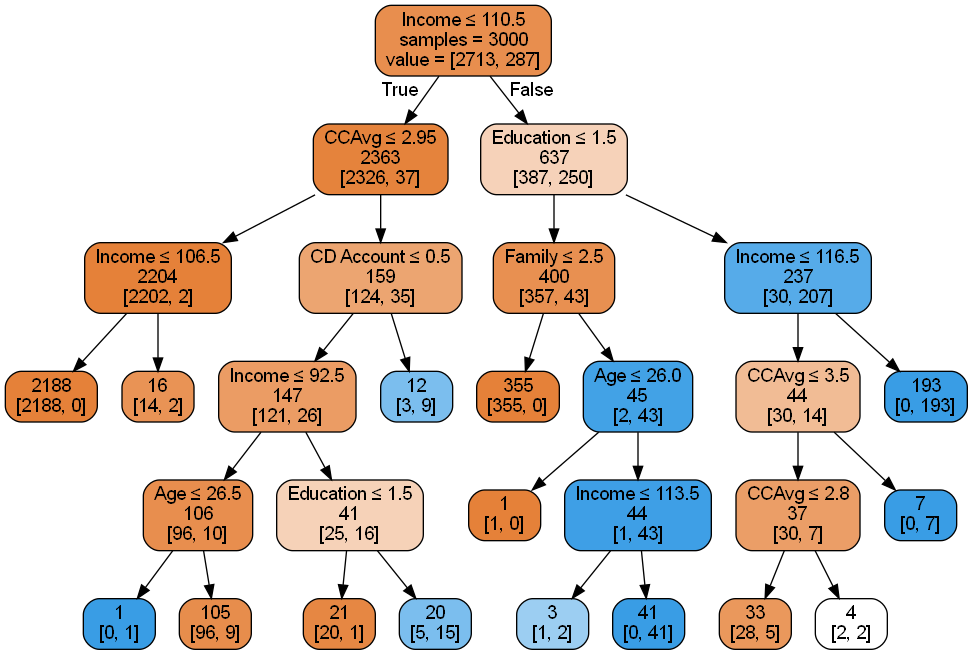

In [20]:
# Create classification tree based on the improved parameters.
bestClassTree = gridSearch.best_estimator_

# Display classification tree based on improved parameters.
print('Best Classification Tree with Grid Search')
plotDecisionTree(bestClassTree, feature_names=train_X.columns)

In [21]:
# Indetify and display number of nodes in the tree
# based on grid search.
tree_nodes_grid = bestClassTree.tree_.node_count
print('Number of nodes:', tree_nodes_grid)

Number of nodes: 29


In [22]:
# Confusion matrices for grid search classification tree. 

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, bestClassTree.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.9907)

       Prediction
Actual    0    1
     0 2704    9
     1   19  268

Validation Partition
Confusion Matrix (Accuracy 0.9830)

       Prediction
Actual    0    1
     0 1793   14
     1   20  173


## Develop regression tree for Toyota Corolla data set. 

In [23]:
# Create data frame for Toyota Corolla data set with 1000 top records.
ToyotaCorolla_df = pd.read_csv('ToyotaCorolla.csv').iloc[:1000,:]

# Display column names of ToyotaCorolla data frame.
print(ToyotaCorolla_df.columns)

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')


In [24]:
# Change column names, identify predictors and outcome, and data partitioning.

# Change some column names to shorter names. 
ToyotaCorolla_df = ToyotaCorolla_df.rename(columns={'Age_08_04': 'Age', 
                   'Quarterly_Tax': 'Tax', 'Met_Color': 'Metalic',
                   'Fuel_Type': 'Fuel'})

# Identify predictors and outcome for regression tree. 
predictors = ['Age', 'KM', 'Fuel', 'HP', 'Metalic', 'Automatic', 'CC', 
              'Doors', 'Tax', 'Weight']
outcome = 'Price'

# Name predictors and outcome data frames as X and y, respectively. 
# Convert, if necessary, categorical variables to dummy variables. 
X = pd.get_dummies(ToyotaCorolla_df[predictors], drop_first=True)
y = ToyotaCorolla_df[outcome]

# Create data partition with training set, 60%(0.6), and 
# validation set 40%(0.4) of the ToyotaCorolla data set.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)


In [25]:
# Grid search to find optimized regression tree.

# Start with an initial guess for parameters.
param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50],}

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeRegressor() initial parameters. 
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

# Display best initial paramenters of regression tree. 
print(f'Initial score:{gridSearch.best_score_:.4f}')
print('Initial parameters: ', gridSearch.best_params_)

Initial score:0.8415
Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 20}


In [26]:
# Improve grid search parameters by adapting grid based 
# on results from initial grid search parameters.
param_grid = {
    'max_depth': list(range(2, 10)), 
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 
                   0.004, 0.005], 
    'min_samples_split': list(range(10, 30)), 
}

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeRegressor() new parameters. 
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

# Display best improved paramenters of regression tree. 
print()
print(f'Improved score:{gridSearch.best_score_:.4f}')
print('Improved parameters: ', gridSearch.best_params_)


Improved score:0.8492
Improved parameters:  {'max_depth': 6, 'min_impurity_decrease': 0, 'min_samples_split': 17}


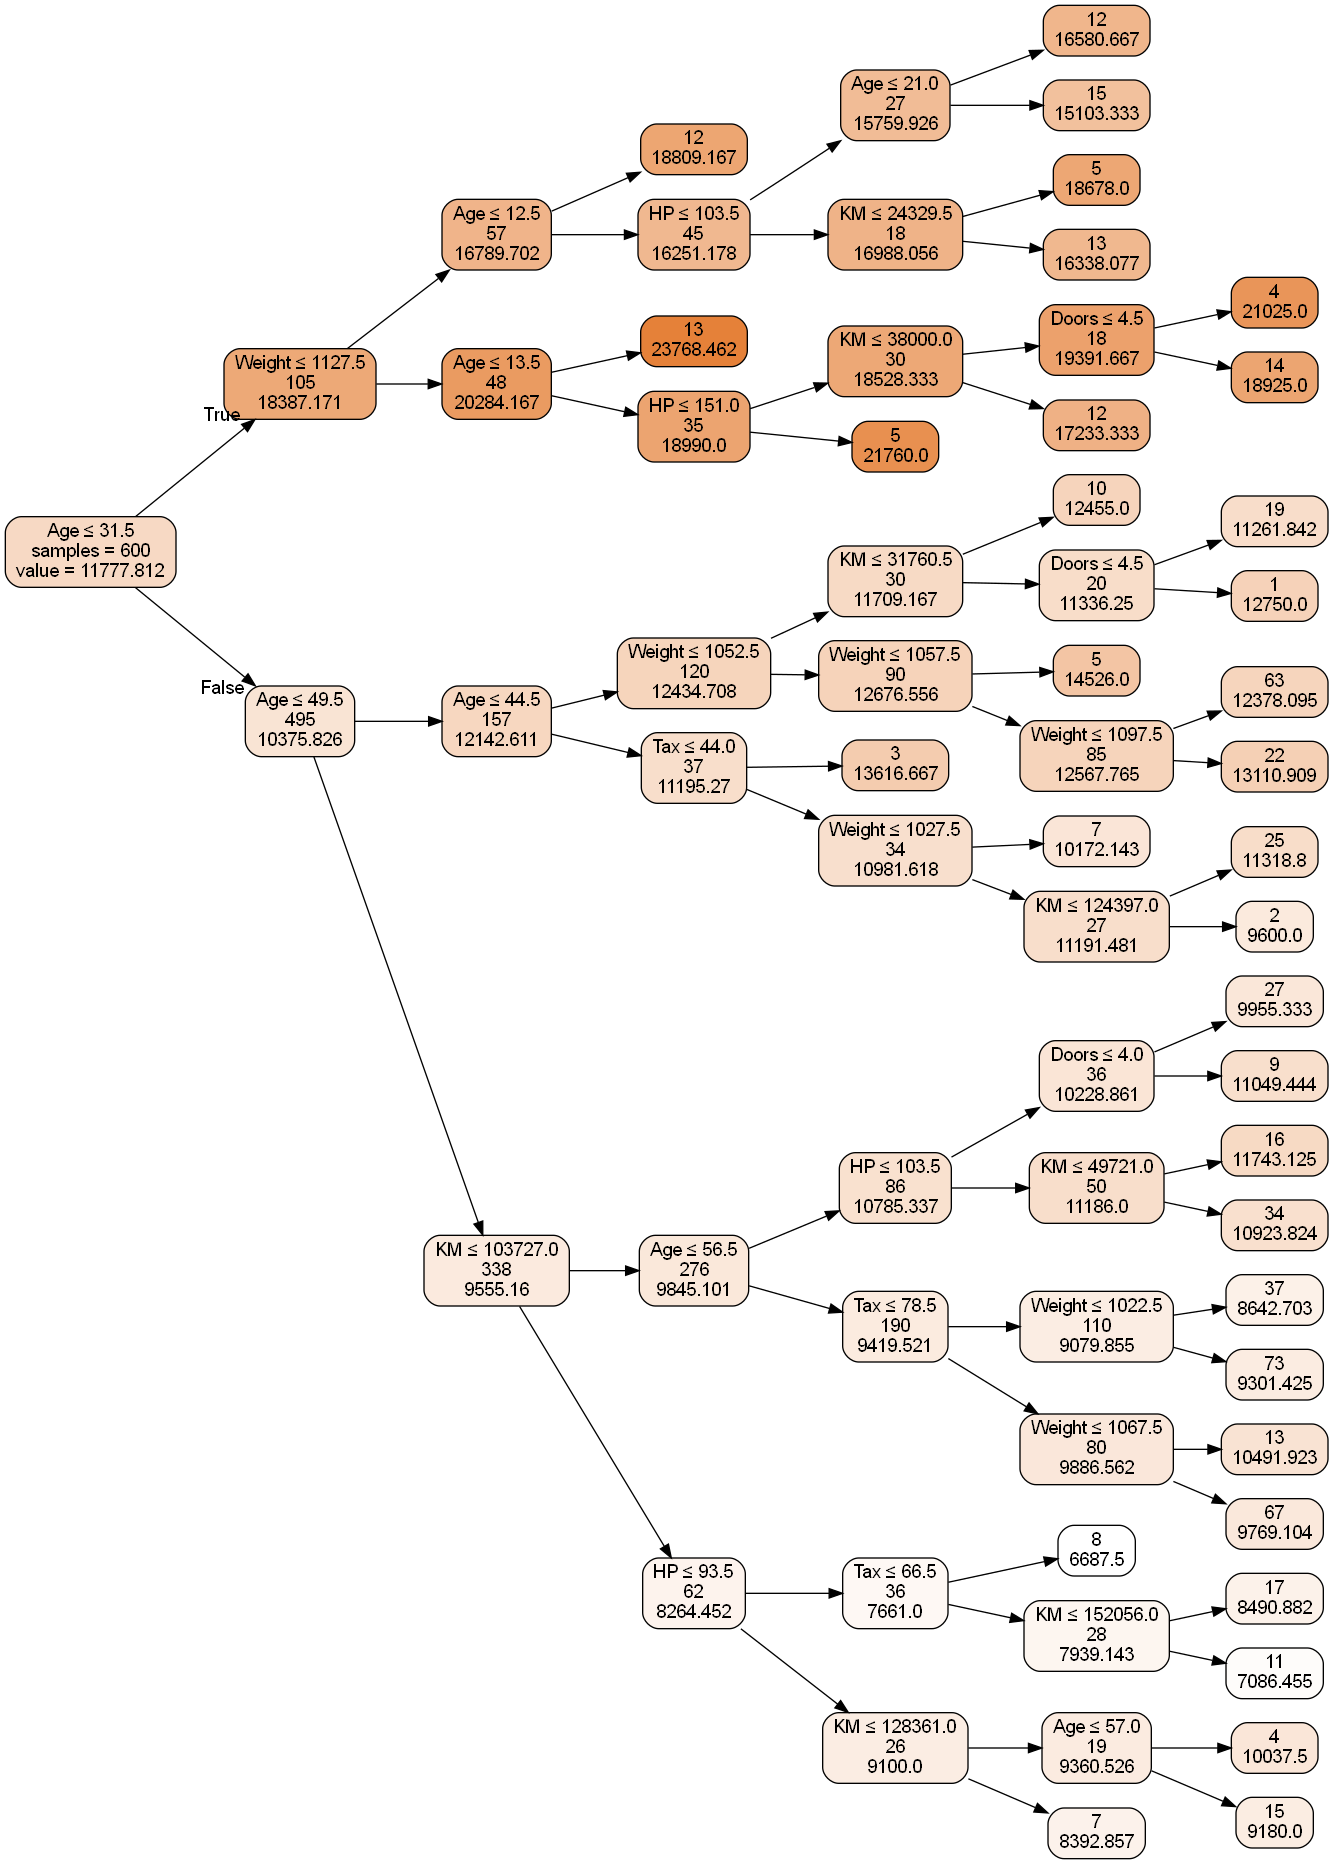

In [27]:
# Create regression tree based on the improved parameters. 
bestRegTree = gridSearch.best_estimator_

# Display regression tree bestRegTree based on the best 
# parameters from grid search.
plotDecisionTree(bestRegTree, feature_names=train_X.columns, rotate=True)

In [28]:
# Indetify and display number of nodes in the regression tree.
tree_nodes = bestRegTree.tree_.node_count
print('Number of nodes:', tree_nodes)

Number of nodes: 67


In [29]:
# Regression tree accuracy measures for training and
# validation partitions. 

# Identify and display regression tree accuracy measures 
# for training partition.
print('Accuracy Measures for Training Partition for Regression Tree')
regressionSummary(train_y, bestRegTree.predict(train_X))

# Identify and display regression tree accuracy measures 
# for validation partition.
print()
print('Accuracy Measures for Validation Partition for Regression Tree')
regressionSummary(valid_y, bestRegTree.predict(valid_X))

Accuracy Measures for Training Partition for Regression Tree

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1058.8202
            Mean Absolute Error (MAE) : 767.7203
          Mean Percentage Error (MPE) : -0.8074
Mean Absolute Percentage Error (MAPE) : 6.8325

Accuracy Measures for Validation Partition for Regression Tree

Regression statistics

                      Mean Error (ME) : 60.5241
       Root Mean Squared Error (RMSE) : 1554.9146
            Mean Absolute Error (MAE) : 1026.3487
          Mean Percentage Error (MPE) : -1.3082
Mean Absolute Percentage Error (MAPE) : 9.2311


In [30]:
# Make predictions for new data using Toyota Corolla tree. 

# Develop dataframe with 2 new records. 
# Notice that the 'Price' output variable
# is not present in these records.
new_reg_data = pd.DataFrame({
            'Age': [24,34],  
            'KM': [35200, 20840],
            'HP': [90, 190],  
            'Metalic': [0, 0],
            'Automatic': [0, 1],
            'CC': [0,0],
            'Doors': [3, 4],  
            'Tax': [85, 220],  
            'Weight': [1120, 1000],
            'Fuel_Diesel': [1, 0],
            'Fuel_Petrol': [0, 1],  
})

# Make predictions for new Toyota Corolla data using
# regression tree and round them to 2 decimals.
pred_reg_tree = bestRegTree.predict(new_reg_data)
pred_reg_tree = np.round(pred_reg_tree, decimals=2)

# Display new data and display 'Price' prediction 
# for each record.
pred_reg_result = pd.DataFrame({
            'Age': [24,34],  
            'KM': [35200, 20840],
            'HP': [90, 190],  
            'Metalic': [0, 0],
            'Automatic': [0, 1],
            'CC': [0,0],
            'Doors': [3, 4],  
            'Tax': [85, 220],  
            'Weight': [1120, 1000],
            'Fuel_Diesel': [1, 0],
            'Fuel_Petrol': [0, 1],  
            'Predicted Price': pred_reg_tree,
})

print('New Toyota Corolla Data and Predictions for New Data')
print(pred_reg_result)

New Toyota Corolla Data and Predictions for New Data
   Age     KM   HP  Metalic  Automatic  CC  Doors  Tax  Weight  Fuel_Diesel  \
0   24  35200   90        0          0   0      3   85    1120            1   
1   34  20840  190        0          1   0      4  220    1000            0   

   Fuel_Petrol  Predicted Price  
0            0         15103.33  
1            1         12455.00  


## Apply Random Forest algorithm for Universal Bank personal loans. 

In [31]:
# Create data frame for Universal Bank data set.
bank_df = pd.read_csv('UniversalBank.csv')

# Drop (remove)'ID' and 'ZIP Code' variables which are
# not relevant for model building. 
bank_df = bank_df.drop(columns=['ID', 'ZIP Code'])

# Define predictors X (all variabels without 'Personal Loan'),
# and outcome variable y ('Personal Loan').
X = bank_df.drop(columns=['Personal Loan'])
y = bank_df['Personal Loan']

# Create data partition with training set, 60%(0.6), and 
# validation set 40%(0.4) of the ToyotaCorolla data set.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [32]:
# Apply RandomForestClassifier() function to develop a combined
# (ensemple) classification tree using Random Forest algorithm.
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)

# Display number of nodes in Random Forest trees.
n_nodes = rf.estimators_[0].tree_.node_count
print('Number of Nodes in Tree in Random Forest:', n_nodes)

Number of Nodes in Tree in Random Forest: 167


In [33]:
# Confusion matrices for Random Forest classification. 

# Identify  and display confusion matrix for training partition. 
print('Training Partition for Random Forests')
classificationSummary(train_y, rf.predict(train_X))

# Identify  and display confusion matrix for validation partition. 
print()
print('Validation Partition for Random Forests')
classificationSummary(valid_y, rf.predict(valid_X))

Training Partition for Random Forests
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 2713    0
     1    0  287

Validation Partition for Random Forests
Confusion Matrix (Accuracy 0.9820)

       Prediction
Actual    0    1
     0 1803    4
     1   32  161


In [34]:
# For Random Forest, identify variable importance scores. 
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

# Develop data frame for variable importance. The table data is sorted
# in descending order (ascending=False).
score_df = pd.DataFrame({'Feature': train_X.columns, 'Importance': importances, 'Std': std})
score_df = score_df.sort_values('Importance', ascending=False)

# Display variable importance for Random Forest results. 
print('Variable Importance Scores for Random Forest')
print(score_df)

Variable Importance Scores for Random Forest
               Feature  Importance       Std
2               Income    0.333756  0.129227
5            Education    0.200772  0.101002
4                CCAvg    0.172105  0.103011
3               Family    0.111375  0.053146
8           CD Account    0.057917  0.043185
0                  Age    0.036258  0.015858
1           Experience    0.035539  0.016061
6             Mortgage    0.034243  0.023469
10          CreditCard    0.007678  0.007053
9               Online    0.006394  0.005350
7   Securities Account    0.003964  0.004998


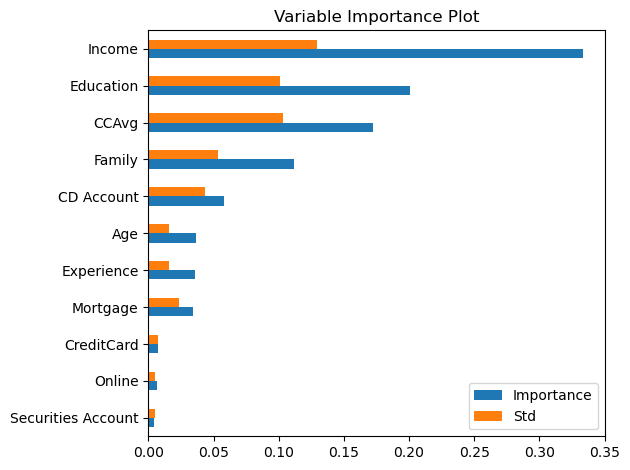

In [35]:
# Develop variable importance plot.
score_df = score_df.sort_values('Importance')
ax = score_df.plot(kind='barh', x='Feature')
ax.set_ylabel('')
plt.title('Variable Importance Plot')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

## Apply Boosted Tree algorithm for Universal Bank personal loans. 

In [36]:
# Apply GradientBoostingClassifier() function to develop a combined
# boosted tree.  
boost = GradientBoostingClassifier(n_estimators=500, random_state=1)
boost.fit(train_X, train_y)

GradientBoostingClassifier(n_estimators=500, random_state=1)

In [37]:
# Confusion matrices for Boosted Tree classification. 

# Identify  and show confusion matrix for training partition. 
print('Training Partition for Boosted Tree')
classificationSummary(train_y, boost.predict(train_X))

# Identify  and show confusion matrix for validation partition. 
print()
print('Validation Partition for Boosted Tree')
classificationSummary(valid_y, boost.predict(valid_X))

Training Partition for Boosted Tree
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 2713    0
     1    0  287

Validation Partition for Boosted Tree
Confusion Matrix (Accuracy 0.9850)

       Prediction
Actual    0    1
     0 1800    7
     1   23  170
